In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
import numpy as np

def MonteCarlo(N=100000, d=1, l=1):
    estimates = []
    probabilities = []
    crossings = 0

    for n in range(1, N + 1):
        x = np.random.uniform(0, d / 2)
        theta = np.random.uniform(0, np.pi / 2)
        length = (l / 2) * np.sin(theta)

        if length >= x:
            crossings += 1

        probability = crossings / n
        probabilities.append(probability)

        if probability != 0:
            pi_est = (2 * n * l) / (d * crossings)
            estimates.append(pi_est)
        else:
            estimates.append(0)

    return estimates, probabilities

pi_estimates, probabilities = MonteCarlo()
print(pi_estimates[-20:-1])
print(probabilities[-20:-1])

[3.1392687253716813, 3.1393001240246794, 3.139331522677677, 3.1393136362209173, 3.1393450343809852, 3.139376432541053, 3.1393585456600577, 3.139340659340659, 3.1393227735828324, 3.1393048883865498, 3.1392870037517855, 3.139318399447436, 3.1393497951430858, 3.139331910084139, 3.1393140255866885, 3.139296141650708, 3.1392782582761707, 3.13926037546305, 3.1392917686946693]
[0.6370910472989868, 0.6370846752415434, 0.637078303311563, 0.6370819331092975, 0.6370755613342002, 0.6370691896865561, 0.6370728194665306, 0.6370764491739008, 0.6370800788086689, 0.637083708370837, 0.6370873378604074, 0.6370809664773182, 0.6370745952216655, 0.6370782246934816, 0.6370818540927047, 0.6370854834193368, 0.6370891126733802, 0.6370927418548371, 0.6370863708637087]


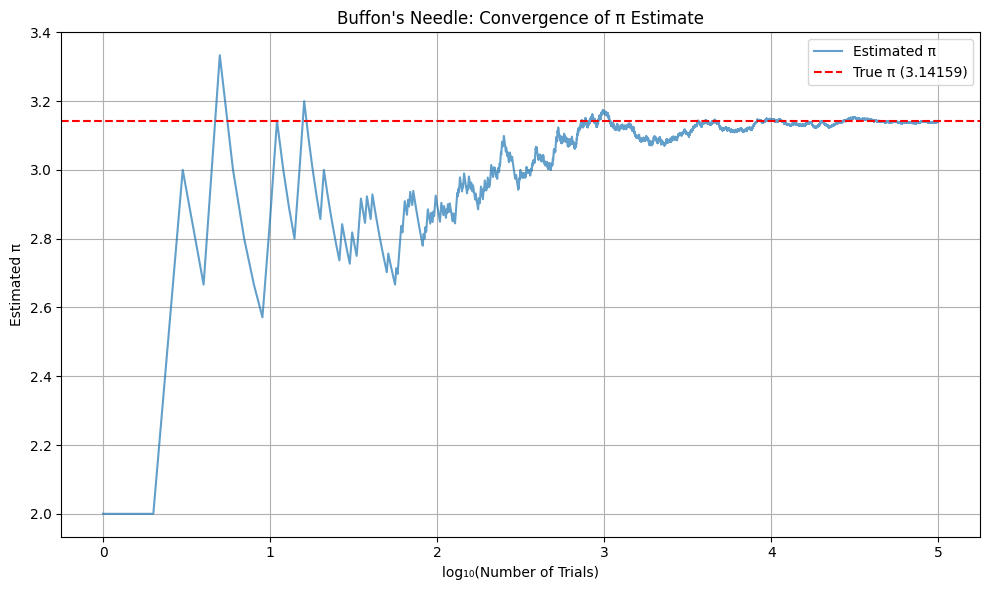

In [71]:
x_vals = np.log10(np.arange(1, N + 1))

#plotting the convergence of π as N increases
plt.figure(figsize=(10, 6))
plt.plot(x_vals, pi_estimates, label='Estimated π', alpha=0.7)
plt.axhline(np.pi, color='red', linestyle='--', label='True π (%.5f)' % np.pi)
plt.xlabel('log₁₀(Number of Trials)')
plt.ylabel('Estimated π')
plt.title("Buffon's Needle: Convergence of π Estimate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Sources of Error** 

-- Monte Carlo simulation relies on random numbers and each run gives a slightly different result.

-- For small values of n, the number of crossings is very low which skews the initial estimates.

-- The $\texttt{np.random.uniform}$ is deterministic and does not generate perfectly random numbers. 

-- The estimates depend on $\sin(\theta)$ which either over represents or under represents very small or large angles. For short needles this is very sensitive.


